In [1]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2 as cv

In [2]:
class FCM:
    def __init__(self, image, number_of_clusters, r, epsilon, number_of_iter):        
        self.image = image
        self.number_of_clusters = number_of_clusters
        self.r = r
        self.epsilon = epsilon
        self.number_of_iter = number_of_iter    
        self.shape = image.shape
        self.image = image.flatten().astype('float')
        self.numpixels = image.size
        
    def membership_matrix(self):
        M = np.zeros((self.numpixels, self.number_of_clusters))
        index = np.arange(self.numpixels)
        
        for i in range(self.number_of_clusters):
            idx = index % self.number_of_clusters==i
            M[idx, i] = 1
        return M
    
    def update_membership(self):
        c,idx = np.meshgrid(self.Center,self.image)
        power = 2./(self.r-1)
        p1 = abs(idx-c)**power
        p2 = np.sum((1./abs(idx-c))**power,axis=1)        
        return 1./(p1*p2[:,None])

    def update_C(self):
        a = np.dot(self.image,self.member ** self.r)
        b = np.sum(self.member ** self.r,axis=0)
        return a/b
                       
    def create_clusters(self):             
        d = 100
        self.member = self.membership_matrix()
        if self.number_of_iter != -1:
            i = 0
            while True:             
                self.Center = self.update_C()
                old_membership = np.copy(self.member)
                self.member = self.update_membership()
                d = np.sum(abs(self.member - old_membership))

                if d < self.epsilon or i > self.number_of_iter:
                    break
                i+=1
        
        self.seg_image()

    def fuzzy(self):
        return np.argmax(self.member, axis = 1)
    def seg_image(self):        
        result = self.fuzzy()
        self.result = result.reshape(self.shape).astype('int')
        return self.result

In [20]:
image = cv.imread(r"C:\Users\Asus\Downloads\Indian_pines_170.png", 0)
image2 = cv.imread(r"C:\Users\Asus\Downloads\Salinas_170.png", 0)
image3 = cv.imread(r"C:\Users\Asus\Downloads\PaviaU_60.png", 0)
list_of_image = []
list_of_image.append(image)
list_of_image.append(image2)
list_of_image.append(image3)
list_of_seg = []
for i in range(len(list_of_image)):
    cluster = FCM(list_of_image[i], number_of_clusters=16, r=2, epsilon=0.2, number_of_iter=1000)
    cluster.create_clusters()
    result=cluster.result
    list_of_seg.append(result)


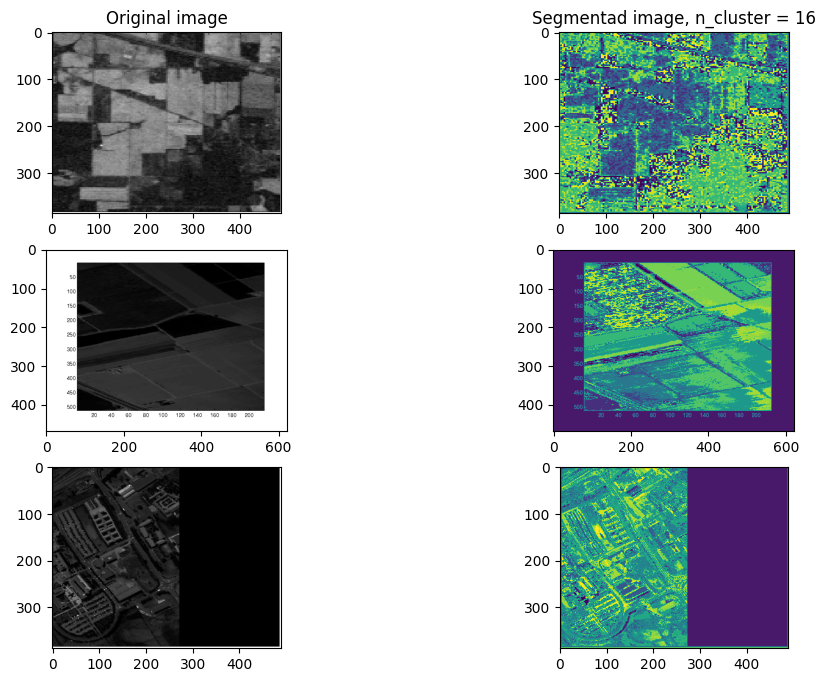

In [21]:
plt.figure(figsize=[12,8])
plt.subplot(321);plt.imshow(image, cmap='gray');plt.title("Original image")
plt.subplot(322);plt.imshow(list_of_seg[0]);plt.title("Segmentad image, n_cluster = 16")
plt.subplot(323);plt.imshow(image2, cmap='gray');
plt.subplot(324);plt.imshow(list_of_seg[1]);
plt.subplot(325);plt.imshow(image3, cmap='gray');
plt.subplot(326);plt.imshow(list_of_seg[2]);                


plt.show(block=False)
plt.close()